In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt # We'll need this in the next steps

# Import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error

# Tell matplotlib to plot inline
%matplotlib inline

print("--- Executing Step 1: Load Data & Train Models ---")

# --- 1.1. Define File Paths ---
PROCESSED_DATA_DIR = "../data/02_intermediate"
X_TRAIN_PATH = os.path.join(PROCESSED_DATA_DIR, "X_train.csv")
X_TEST_PATH = os.path.join(PROCESSED_DATA_DIR, "X_test.csv")
Y_TRAIN_PATH = os.path.join(PROCESSED_DATA_DIR, "y_train.csv")
Y_TEST_PATH = os.path.join(PROCESSED_DATA_DIR, "y_test.csv")

# --- 1.2. Load the Split Data ---
print("Loading pre-processed data splits...")
try:
    X_train = pd.read_csv(X_TRAIN_PATH)
    X_test = pd.read_csv(X_TEST_PATH)
    
    # Squeeze=True converts the single-column DataFrame into a Series,
    # which is the format scikit-learn expects for the target 'y'.
    y_train = pd.read_csv(Y_TRAIN_PATH).squeeze("columns")
    y_test = pd.read_csv(Y_TEST_PATH).squeeze("columns")
    
    print("Data loaded successfully.")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    
except FileNotFoundError as e:
    print(f"\n--- FATAL ERROR: File Not Found ---")
    print(f"Error: {e}")
    print("Please ensure you have successfully run Milestone 2.")
except Exception as e:
    print(f"\nAn error occurred loading data: {e}")


if 'X_train' in locals():
    # --- 1.3. Initialize Models ---
    print("\nInitializing models...")
    
    # n_jobs=-1 uses all available CPU cores for training
    # random_state=42 ensures results are reproducible
    
    models = {
        'Linear Regression': LinearRegression(n_jobs=-1),
        'Random Forest': RandomForestRegressor(n_jobs=-1, random_state=42),
        'XGBoost': XGBRegressor(n_jobs=-1, random_state=42)
    }

    # --- 1.4. Train Models and Evaluate on TRAINING Data ---
    print("Training models... This may take a minute, especially for Random Forest...")
    
    # We will store the trained models and their scores here
    trained_models = {}
    train_scores = {}

    for name, model in models.items():
        print(f"--- Training {name} ---")
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Store the trained model
        trained_models[name] = model
        
        # Make predictions on the TRAINING data
        y_train_pred = model.predict(X_train)
        
        # Calculate metrics
        r2 = r2_score(y_train, y_train_pred)
        rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        
        # Store metrics
        train_scores[name] = {'R2': r2, 'RMSE': rmse}

    print("\n--- Model Training Complete ---")

    # --- 1.5. Display Training Results ---
    print("\n--- TRAINING SET PERFORMANCE ---")
    print("This shows how well each model *learned* the data.")
    print("--------------------------------------------------")
    
    for name, scores in train_scores.items():
        print(f"Model: {name}")
        print(f"  R-squared (R2): {scores['R2']:.4f}")
        print(f"  RMSE:           {scores['RMSE']:.4f}")
        print("--------------------------------------------------")

    print("\nStep 1 (Load Data & Train Models) is complete.")
    print("Based on these scores, Random Forest and XGBoost learned the data much")
    print("better than Linear Regression, as shown by their higher R2 and lower RMSE.")

else:
    print("\n--- Halting execution due to data loading failure. ---")

--- Executing Step 1: Load Data & Train Models ---
Loading pre-processed data splits...
Data loaded successfully.
X_train shape: (15751, 11)
y_train shape: (15751,)

Initializing models...
Training models... This may take a minute, especially for Random Forest...
--- Training Linear Regression ---
--- Training Random Forest ---
--- Training XGBoost ---

--- Model Training Complete ---

--- TRAINING SET PERFORMANCE ---
This shows how well each model *learned* the data.
--------------------------------------------------
Model: Linear Regression
  R-squared (R2): 0.0368
  RMSE:           857.7996
--------------------------------------------------
Model: Random Forest
  R-squared (R2): 0.9942
  RMSE:           66.5003
--------------------------------------------------
Model: XGBoost
  R-squared (R2): 0.9999
  RMSE:           6.3026
--------------------------------------------------

Step 1 (Load Data & Train Models) is complete.
Based on these scores, Random Forest and XGBoost learned the 


--- Executing Step 2: Model Selection & Generalization Test ---
Evaluating models on the UNSEEN test data...
--- Evaluating Random Forest on Test Set ---
--- Evaluating XGBoost on Test Set ---

--- Model Generalization Check (Train vs. Test) ---
This is the most important test for model performance.
---------------------------------------------------------
Model: Random Forest
  Training R2:   0.9942 	| Test R2:   0.9798
  Training RMSE: 66.50 	| Test RMSE: 127.29
  ** Good generalization for Random Forest. **
---------------------------------------------------------
Model: XGBoost
  Training R2:   0.9999 	| Test R2:   0.9574
  Training RMSE: 6.30 	| Test RMSE: 184.76
  ** Good generalization for XGBoost. **
---------------------------------------------------------

--- Model Selection ---
Selected Model: Random Forest (based on highest Test R2 score)

Generating Actual vs. Predicted plot for Random Forest...
Plot saved successfully to: ../04_reports/figures\03_actual_vs_predicted_plo

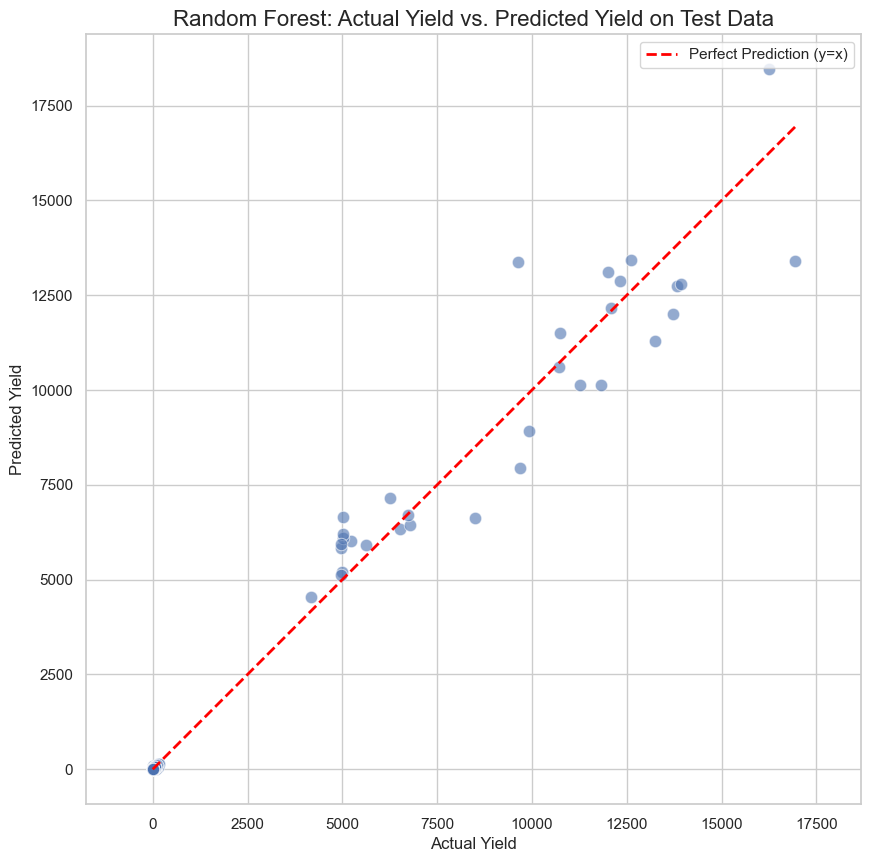


Step 2 (Model Selection & Generalization Test) is complete.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# These models are still in memory from the previous cell:
# trained_models['Random Forest']
# trained_models['XGBoost']
# train_scores['Random Forest']
# train_scores['XGBoost']

print("\n--- Executing Step 2: Model Selection & Generalization Test ---")
print("Evaluating models on the UNSEEN test data...")

# --- 2.1. Evaluate Models on Test Data ---

test_scores = {}

# We will test both high-performing models
models_to_test = ['Random Forest', 'XGBoost']

for name in models_to_test:
    print(f"--- Evaluating {name} on Test Set ---")
    
    # Get the model we trained in the previous cell
    model = trained_models[name]
    
    # Make predictions on the TEST data
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Store metrics
    test_scores[name] = {'R2': r2, 'RMSE': rmse}

print("\n--- Model Generalization Check (Train vs. Test) ---")
print("This is the most important test for model performance.")
print("---------------------------------------------------------")

best_model = None
best_model_name = ""
best_test_r2 = -np.inf

for name in models_to_test:
    train_r2 = train_scores[name]['R2']
    test_r2 = test_scores[name]['R2']
    
    train_rmse = train_scores[name]['RMSE']
    test_rmse = test_scores[name]['RMSE']
    
    print(f"Model: {name}")
    print(f"  Training R2:   {train_r2:.4f} \t| Test R2:   {test_r2:.4f}")
    print(f"  Training RMSE: {train_rmse:.2f} \t| Test RMSE: {test_rmse:.2f}")
    
    # Check for overfitting
    if (train_r2 - test_r2) > 0.05: # More than 5% drop-off
        print(f"  !! WARNING: Possible overfitting detected on {name}. !!")
    else:
        print(f"  ** Good generalization for {name}. **")

    print("---------------------------------------------------------")
    
    # Select the model with the best TEST score
    if test_r2 > best_test_r2:
        best_test_r2 = test_r2
        best_model_name = name
        best_model = trained_models[name]

print(f"\n--- Model Selection ---")
print(f"Selected Model: {best_model_name} (based on highest Test R2 score)")


# --- 2.2. Plot Actual vs. Predicted for the Best Model ---
print(f"\nGenerating Actual vs. Predicted plot for {best_model_name}...")

# Make predictions with the best model (on test data)
y_best_pred = best_model.predict(X_test)

# Create a DataFrame for easy plotting with seaborn
plot_df = pd.DataFrame({'Actual Yield': y_test, 'Predicted Yield': y_best_pred})

# Create the scatter plot
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")

# We add a 45-degree line (y=x). A perfect model would have all points on this line.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction (y=x)')

sns.scatterplot(
    x='Actual Yield', 
    y='Predicted Yield', 
    data=plot_df, 
    alpha=0.6,  # Set transparency
    s=80        # Set marker size
)

plt.title(f'{best_model_name}: Actual Yield vs. Predicted Yield on Test Data', fontsize=16)
plt.xlabel('Actual Yield', fontsize=12)
plt.ylabel('Predicted Yield', fontsize=12)
plt.legend()
plt.axis('equal') # Ensure x and y axes have the same scale for a true 45-degree line
plt.grid(True)

# Define save path in '04_reports/figures'
FIGURES_DIR = "../04_reports/figures"
PREDICTION_PLOT_PATH = os.path.join(FIGURES_DIR, "03_actual_vs_predicted_plot.png")

# Save the figure
try:
    plt.savefig(PREDICTION_PLOT_PATH, bbox_inches='tight')
    print(f"Plot saved successfully to: {PREDICTION_PLOT_PATH}")
except Exception as e:
    print(f"\nError saving plot: {e}")

# Show the plot
plt.show()

print("\nStep 2 (Model Selection & Generalization Test) is complete.")


--- Executing Step 3: Model Interpretation for Random Forest ---
Extracting feature importances from the model...

--- Top 10 Most Important Features ---
            Feature  Importance
8      Crop_encoded    0.846236
10    State_encoded    0.063556
7           pH_SOIL    0.025618
3         Pesticide    0.013875
0         Crop_Year    0.010286
4            N_SOIL    0.009503
6            K_SOIL    0.009500
2        Fertilizer    0.008944
1   Annual_Rainfall    0.006776
5            P_SOIL    0.005671

Generating feature importance plot...
Plot saved successfully to: ../04_reports/figures\04_feature_importance_plot.png


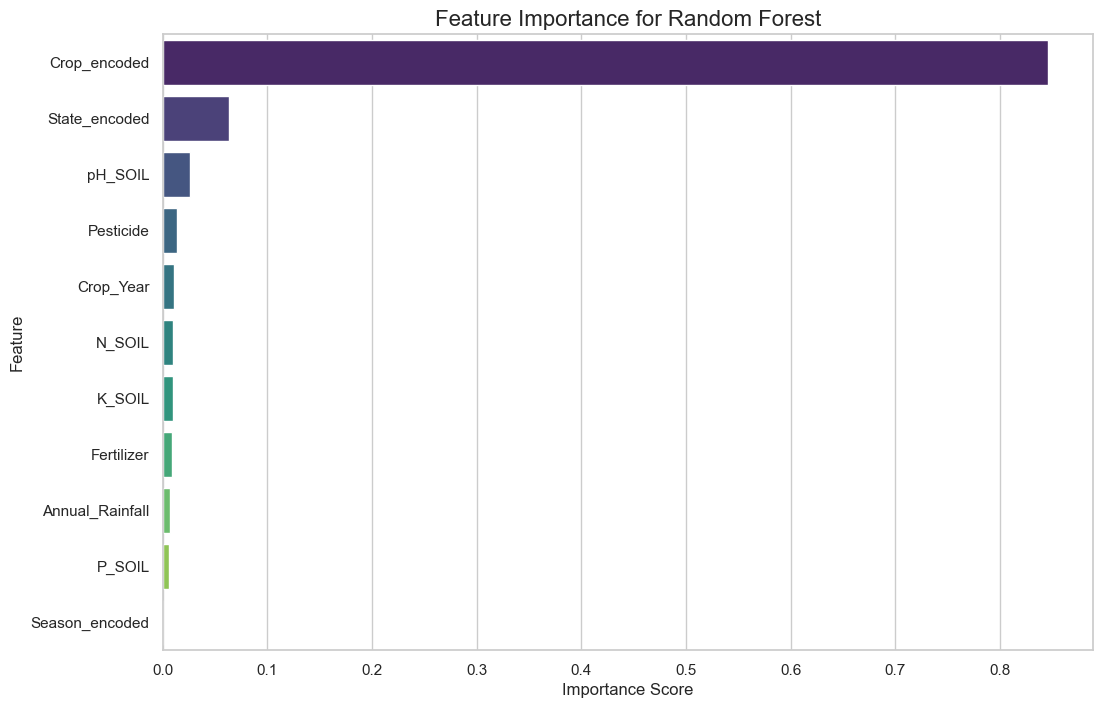


Step 3 (Model Interpretation) is complete.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(f"\n--- Executing Step 3: Model Interpretation for {best_model_name} ---")

# --- 3.1. Extract Feature Importances ---
print("Extracting feature importances from the model...")

# Get the importance scores from the trained model
importances = best_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to hold features and their scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False) # Sort by most important first

print("\n--- Top 10 Most Important Features ---")
print(feature_importance_df.head(10))

# --- 3.2. Plot Feature Importances ---
print("\nGenerating feature importance plot...")

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a bar plot
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df,
    palette='viridis' # Use a pleasant color palette
)

plt.title(f'Feature Importance for {best_model_name}', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# --- 3.3. Save the Plot ---
FIGURES_DIR = "../04_reports/figures"
IMPORTANCE_PLOT_PATH = os.path.join(FIGURES_DIR, "04_feature_importance_plot.png")

try:
    plt.savefig(IMPORTANCE_PLOT_PATH, bbox_inches='tight')
    print(f"Plot saved successfully to: {IMPORTANCE_PLOT_PATH}")
except Exception as e:
    print(f"\nError saving plot: {e}")

# Show the plot
plt.show()

print("\nStep 3 (Model Interpretation) is complete.")

In [4]:
import joblib
import os

# These variables are still in memory from the previous cells:
# best_model (our trained Random Forest)
# best_model_name (the string 'Random Forest')

print(f"\n--- Executing Step 4: Save the Final Model ---")

# --- 4.1. Define Model Save Path ---
MODELS_DIR = "../05_models"
MODEL_FILE_PATH = os.path.join(MODELS_DIR, "final_model.pkl")

# Ensure the '05_models' directory exists (it should from Milestone 2)
os.makedirs(MODELS_DIR, exist_ok=True)

print(f"Saving the best model ({best_model_name}) to: {MODEL_FILE_PATH} ...")

# --- 4.2. Save the Model ---
try:
    # Use joblib.dump to save the model
    # 'compress=3' adds compression to save disk space
    joblib.dump(best_model, MODEL_FILE_PATH, compress=3)
    
    print("\nModel saved successfully!")
    print("This file contains the complete, trained model.")

except Exception as e:
    print(f"\nError saving model: {e}")


print("\n--- MILESTONE 3 COMPLETE ---")
print("We have successfully trained, evaluated, interpreted,")
print("and saved our final predictive model.")


--- Executing Step 4: Save the Final Model ---
Saving the best model (Random Forest) to: ../05_models\final_model.pkl ...

Model saved successfully!
This file contains the complete, trained model.

--- MILESTONE 3 COMPLETE ---
We have successfully trained, evaluated, interpreted,
and saved our final predictive model.
